In [48]:
import os
output_files_loc = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(my_PC)/PhD(output_files)/GPR/240617_reimplementing_GPR/simple_GPR"


Let us again start simple and go forward. Again let us consider the example, 
$$
f(x) = x sin(x)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x_plot = np.linspace(0,10,1000)
y_plot = x_plot* np.sin(x_plot)


### Data generation:

Lets generate n = 7 data points uniformly spaced and lets perform GPR on the data.

In [53]:
n = 6
x_train = np.linspace(0,10, n)
y_train = x_train * np.sin(x_train)


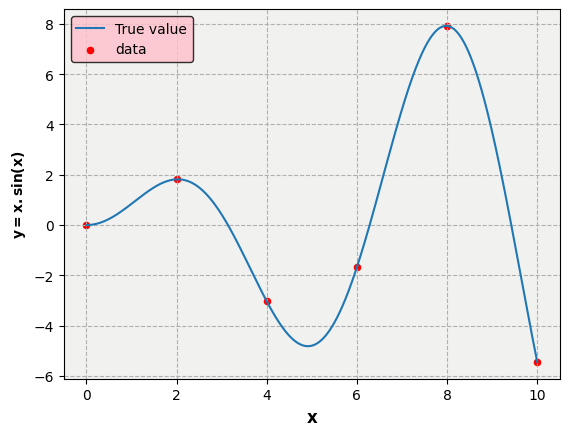

In [54]:
plt.grid("on",linestyle="--")
plt.rcParams['axes.facecolor'] = '#f1f1f0'


plt.plot(x_plot,y_plot,label="True value")
plt.scatter(x_train,y_train, color= "red",marker = "o",s = 20, label = "data")

plt.xlabel("$\mathbf{x}$", fontweight="bold", fontsize=12)
plt.ylabel("$\mathbf{y = x. sin(x)}$")
legend=plt.legend(edgecolor="black",facecolor="pink", loc="best")

### Scaling the data

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=x_train.reshape(-1,1)
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)

### Fitting the GPR model with RBF


In [73]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern
#from sklearn.gaussian_process.kernels import Quat

kernel_RBF = 1*RBF(length_scale=0.1,length_scale_bounds = [1e-1, 1e2])
gp_RBF = GPR(kernel=kernel_RBF,n_restarts_optimizer=9, random_state=1)
#gp_RBF.max_iter_pred=100000
gp_RBF.fit(x_train_scaled,y_train)
gp_RBF.kernel_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


4.59**2 * RBF(length_scale=0.1)

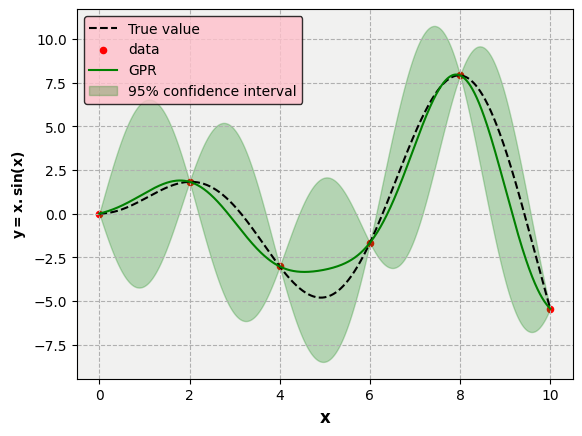

In [75]:
x_test = np.linspace(0,10,1000)
x_test_scaled = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test_scaled)
[y_test_mean_RBF,y_test_std_RBF] = gp_RBF.predict(x_test_scaled,return_std= True)


plt.grid("on",linestyle="--")
plt.rcParams['axes.facecolor'] = '#f1f1f0'


plt.plot(x_plot,y_plot,color="black",linestyle="--",label="True value")
plt.scatter(x_train,y_train, color= "red",marker = "o",s = 20, label = "data")
plt.plot(x_test.ravel(), y_test_mean_RBF,color="green",label="GPR")
plt.fill_between(x_test.ravel(),
                 y_test_mean_RBF+1.96*y_test_std_RBF,
                y_test_mean_RBF-1.96*y_test_std_RBF,
                alpha=0.25,
                color="green", label="95% confidence interval")

plt.xlabel("$\mathbf{x}$", fontweight="bold", fontsize=12)
plt.ylabel("$\mathbf{y = x. sin(x)}$")
legend=plt.legend(edgecolor="black",facecolor="pink", loc="best")

file_name = "2_restricting_length_scale_bounds.pdf"
file_name = os.path.join(output_files_loc,file_name) 

plt.savefig(file_name)

In [51]:
kernel_RBF = 1*RBF(length_scale=0.1,length_scale_bounds = [1e-5, 1e2])

n_list = [6,7,8,30]
gpr_RBF_list = [0,0,0,0]
gpr_RBF_string_list = [0,0,0,0]
y_test_mean_RBF_list = [0,0,0,0]
y_test_std_RBF_list = [0,0,0,0]
x_train_list = [0,0,0,0]
y_train_list = [0,0,0,0]
x_train_scaled_list = [0,0,0,0]

# function definition
def my_func(x):
    y = x*np.sin(x)
    return y

i = 0
for n in n_list:
    # Creating the training data set
    x_train_list[i] = np.linspace(0,10, n)
    y_train_list[i] = my_func(x_train_list[i])
    
    # Scaling the training data set
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    scaler.fit(x_train_list[i].reshape(-1,1))
    x_train_scaled_list[i]=scaler.transform(x_train_list[i].reshape(-1,1))
    
    gpr_RBF_list[i] =  GPR(kernel = kernel_RBF, n_restarts_optimizer=100, random_state=1)
    gpr_RBF_list[i].max_iter_pred=100000
    gpr_RBF_list[i].fit(x_train_scaled_list[i],y_train_list[i])
    gpr_RBF_string_list[i] = str(gpr_RBF_list[i].kernel_)
    y_test_mean_RBF_list[i],y_test_std_RBF_list[i] = gpr_RBF_list[i].predict(x_test_scaled,return_std=True)
    i = i+1
    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


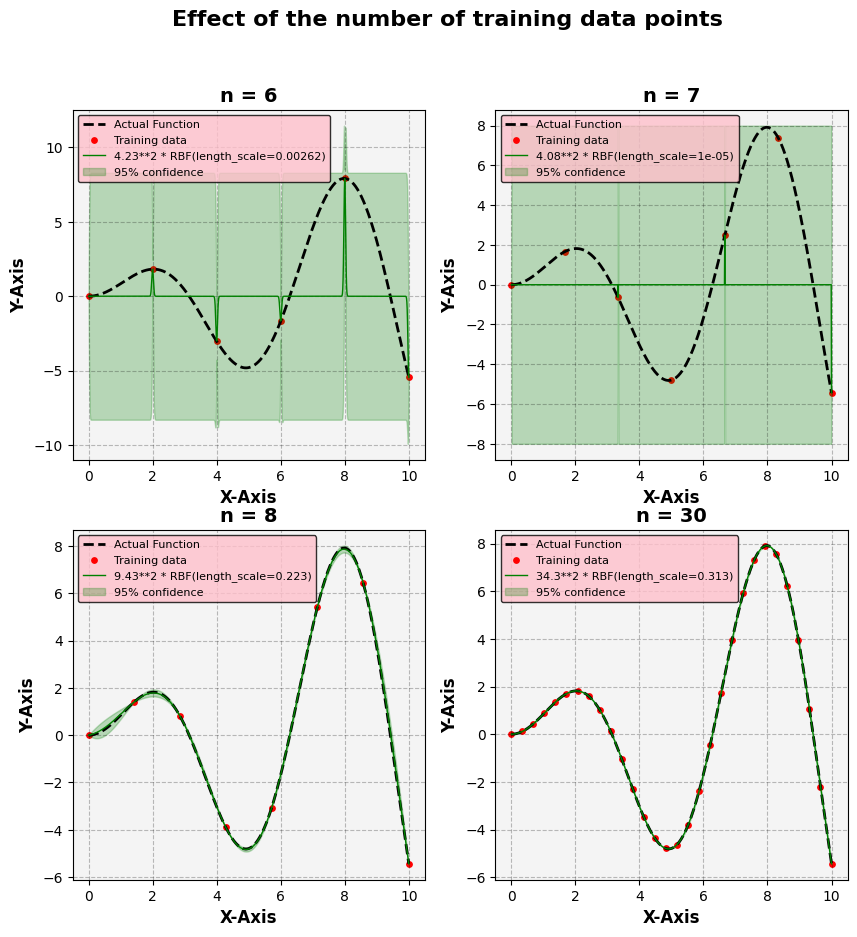

In [52]:
# Visualization
i = 0
fig,axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Effect of the number of training data points", fontweight="bold", fontsize=16)
for rows in [0,1]:
    for cols in [0,1]:
        plot_index = (rows,cols)
        axs[plot_index].set_xlabel("X-Axis", fontweight="bold", fontsize=12)
        axs[plot_index].set_ylabel("Y-Axis", fontweight="bold",fontsize=12)
        axs[plot_index].set_title("n = "+str(n_list[i]), fontweight= "bold",fontsize=14)
        
        axs[plot_index].plot(x_plot,y_plot, "k--",linewidth=2, label="Actual Function")
        axs[plot_index].scatter(x_train_list[i], y_train_list[i],color="r",s=15,label="Training data")
        axs[plot_index].plot(x_test,y_test_mean_RBF_list[i],color = "green",linestyle = "-", linewidth=1, label=  gpr_RBF_string_list[i])
       
        axs[plot_index].fill_between(x_test,
                        y_test_mean_RBF_list[i] + 1.96* y_test_std_RBF_list[i],
                        y_test_mean_RBF_list[i] - 1.96* y_test_std_RBF_list[i],
                        color="green", alpha=0.25,
                                    label = "95% confidence")

       
        axs[plot_index].set_facecolor("#f4f4f4")
        axs[plot_index].grid(True, alpha=0.25, color="black", linestyle="--")
        legend = axs[plot_index].legend(loc="best",facecolor="pink",edgecolor="black",fontsize=8)
        legend.facecolor="pink"
        legend.linewidth=2
        i = i+1

file_name = "1_number_of_training_data_points.pdf"
file_name = os.path.join(output_files_loc,file_name) 

#plt.savefig(file_name)

plt.show()


### Conclusion:
Therefore, there is a minimum number of data points for the prediction to be better. Let us copy paste the same code as given in the example to evaluate and check if we are wrong somewhere?


In [97]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=0.1, length_scale_bounds=(1e-10, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100,random_state=1,optimizer=None,alpha=0.1)
gaussian_process.fit(x_train_scaled, y_train)
gaussian_process.kernel_

1**2 * RBF(length_scale=0.1)

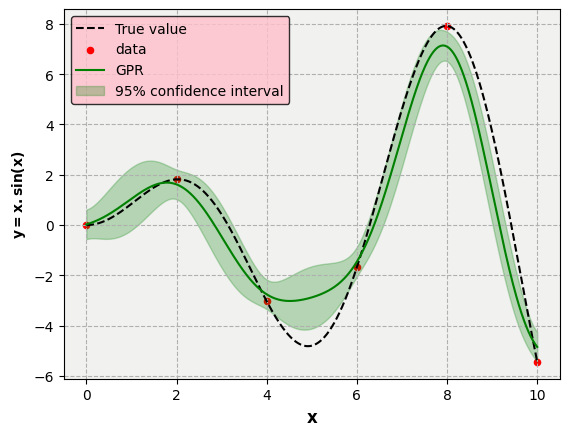

In [98]:
x_test = np.linspace(0,10,1000)
x_test_scaled = x_test.reshape(-1,1)
x_test_scaled = scaler.transform(x_test_scaled)
[y_test_mean_given_RBF,y_test_std_given_RBF] = gaussian_process.predict(x_test_scaled,return_std= True)


plt.grid("on",linestyle="--")
plt.rcParams['axes.facecolor'] = '#f1f1f0'


plt.plot(x_plot,y_plot,color="black",linestyle="--",label="True value")
plt.scatter(x_train,y_train, color= "red",marker = "o",s = 20, label = "data")
plt.plot(x_test.ravel(), y_test_mean_given_RBF,color="green",label="GPR")
plt.fill_between(x_test.ravel(),
                 y_test_mean_given_RBF+1.96*y_test_std_given_RBF,
                y_test_mean_given_RBF-1.96*y_test_std_given_RBF,
                alpha=0.25,
                color="green", label="95% confidence interval")

plt.xlabel("$\mathbf{x}$", fontweight="bold", fontsize=12)
plt.ylabel("$\mathbf{y = x. sin(x)}$")
legend=plt.legend(edgecolor="black",facecolor="pink", loc="best")

In [88]:
gaussian_process.kernel_

1**2 * RBF(length_scale=10)